# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''

'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
from scipy import stats
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math 
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...   173395   173659  173879  174073   
1        0        0        0        0  ...   271527   271563  271702  271825   
2        0        0        0        0  ...   264855   264936  265010  265079   
3        0        0        0        0  ...    37999    37999   38165   38249   
4        0        0        0        0  ...    98701    98741   98746   98746   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0  174214  174214  174331  174582  175000  175353  
1  271825  272030  272030  272210  272250  272337  
2  265130  265186  265227  265265  265297  265323  
3   38342   38434   38434   38434   38620   38710  
4   98746   98796   98796   98806   98806   98829  

[5 rows x 781 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...     7593     7598    7609    7617   
1        0        0        0        0  ...     3464     3469    3472    3474   
2        0        0        0        0  ...     6831     6835    6840    6843   
3        0        0        0        0  ...      151      151     151     151   
4        0        0        0        0  ...     1899     1900    1900    1900   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0    7619    7619    7622    7623    7626    7630  
1    3474    3478    3478    3482    3483    3483  
2    6848    6852    6853    6855    6857    6858  
3     151     151     151     151     151     152  
4    1900    1900    1900    1900    1900    1900  

[5 rows x 781 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...        0        0       0       0   
1        0        0        0        0  ...        0        0       0       0   
2        0        0        0        0  ...        0        0       0       0   
3        0        0        0        0  ...        0        0       0       0   
4        0        0        0        0  ...        0        0       0       0   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0       0       0       0       0       0       0  
1       0       0       0       0       0       0  
2       0       0       0       0       0       0  
3       0       0       0       0       0       0  
4       0       0       0       0       0       0  

[5 rows x 781 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

# Data corretion: make sure cummulative recoveries do not decrease in time
for i in range(1, len(dates)):
    mask  = recoveries_df[dates[i]] < recoveries_df[dates[i - 1]]
    idx = recoveries_df[dates[i]][mask].index.tolist()
    recoveries_df.loc[idx, dates[i]] = recoveries_df.loc[idx, dates[i - 1]]  

recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
for col in dates:
    #total confirmed cases, deaths, recovered up to date at the current col
    current_cases = confirmed[col].sum()
    current_deaths = deaths[col].sum()
    current_recovered = recoveries[col].sum()
    
    # Append dated values sum to corresponding lists.
    total_cases.append(current_cases)
    total_deaths.append(current_deaths)
    total_recovered.append(current_recovered)
    total_active.append(current_cases - current_deaths - current_recovered)

In [8]:
# The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  449718862
Total death cases:  6014690
Total recoveries cases:  137254523
Total active cases:  306449649


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

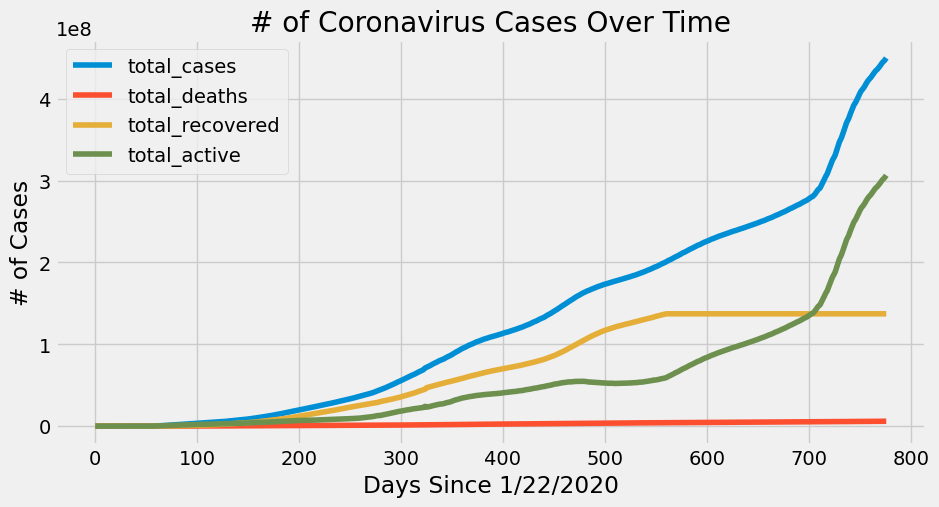

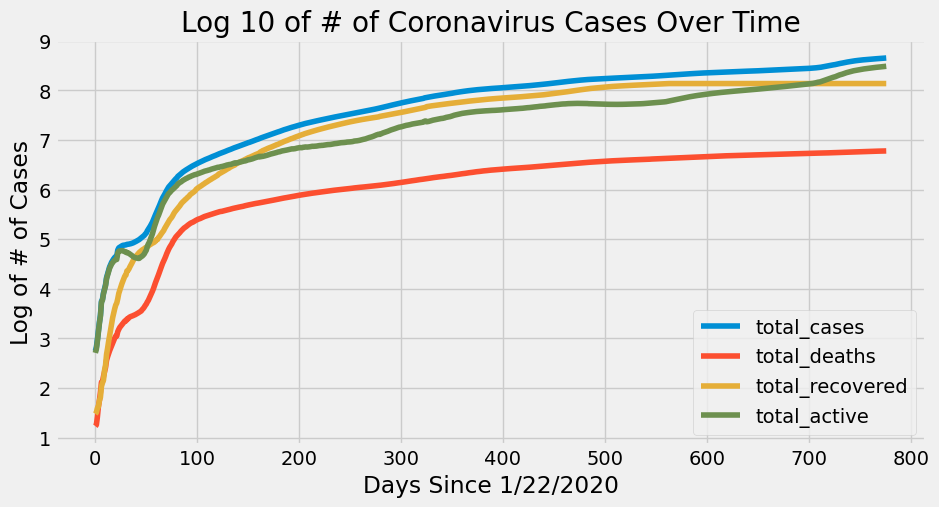

In [9]:
# Chart: number of Coronavirus Cases, Deaths, Recovered Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(total_cases, label = "total_cases")
plt.plot(total_deaths, label = "total_deaths")
plt.plot(total_recovered, label = "total_recovered")
plt.plot(total_active, label = "total_active")

plt.title("# of Coronavirus Cases Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.legend()
plt.show()

# Chart: log(10) of number of Coronavirus Cases, Deaths, Recovered Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.log10(total_cases), label = "total_cases")
plt.plot(np.log10(total_deaths), label = "total_deaths")
plt.plot(np.log10(total_recovered), label = "total_recovered")
plt.plot(np.log10(total_active), label = "total_active")

plt.title("Log 10 of # of Coronavirus Cases Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("Log of # of Cases")

plt.legend()
plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

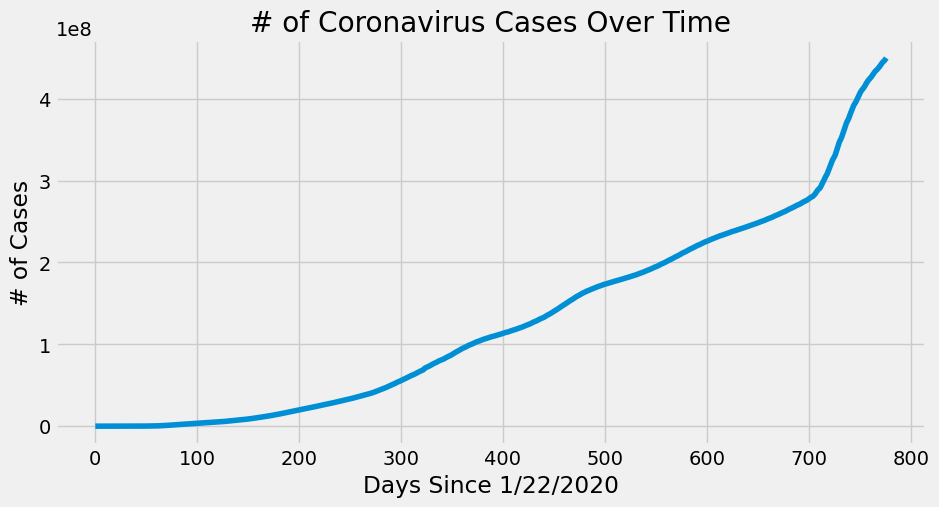

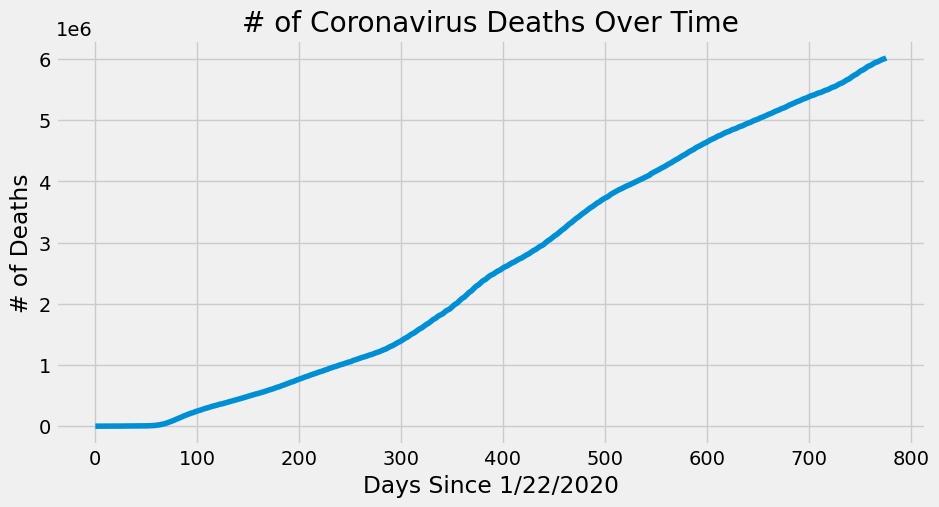

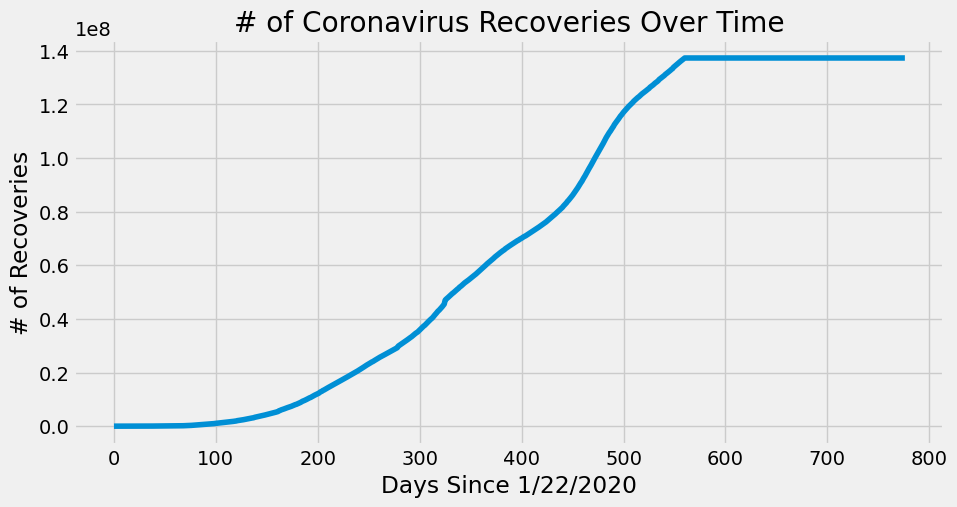

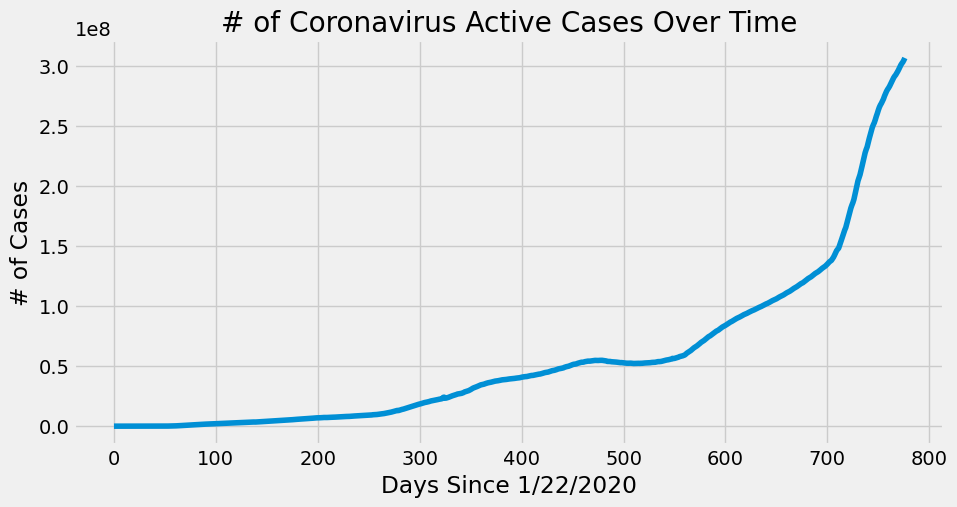

In [10]:
# Chart: number of Coronavirus Cases Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(total_cases, label = "total_cases")

plt.title("# of Coronavirus Cases Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

# Chart: number of Coronavirus Deaths Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(total_deaths, label = "total_deaths")

plt.title("# of Coronavirus Deaths Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Deaths")

plt.show()

# Chart: number of Coronavirus Recoveries Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(total_recovered, label = "total_recovered")

plt.title("# of Coronavirus Recoveries Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Recoveries")

plt.show()

# Chart: number of Coronavirus Active Cases Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(total_active, label = "total_active")

plt.title("# of Coronavirus Active Cases Over Time")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
# Lists storing daily increases in cases, deaths, recovered, active 
increase_cases = [0]
increase_deaths = [0]
increase_recovered = [0]
increase_active = [0]

# Calculate daily increases and store to list if at least 02 days data
if len(total_cases) > 1:
    for i in range(len(total_cases) - 1):
        increase_cases.append(total_cases[i + 1] - total_cases[i])
        increase_deaths.append(total_deaths[i + 1] - total_deaths[i])
        increase_recovered.append(total_recovered[i + 1] - total_recovered[i])
        increase_active.append(total_active[i + 1] - total_active[i])

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

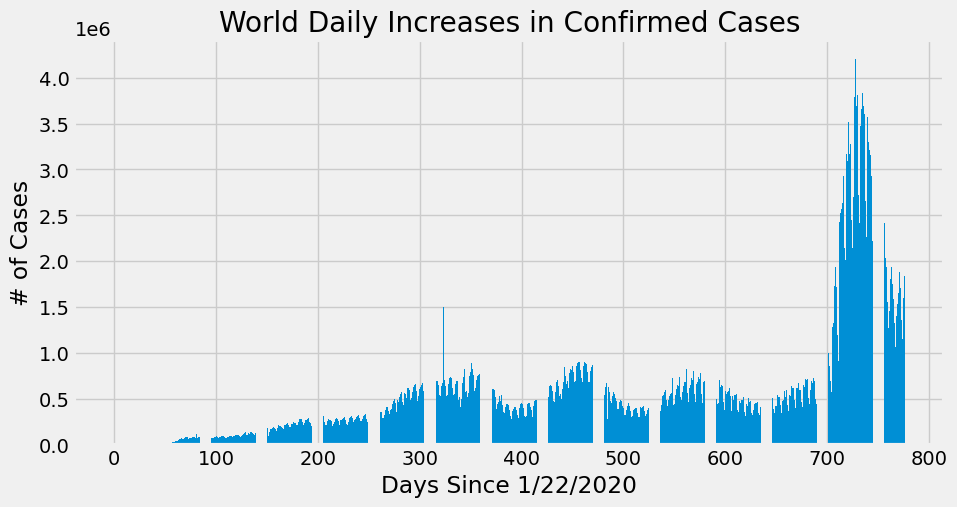

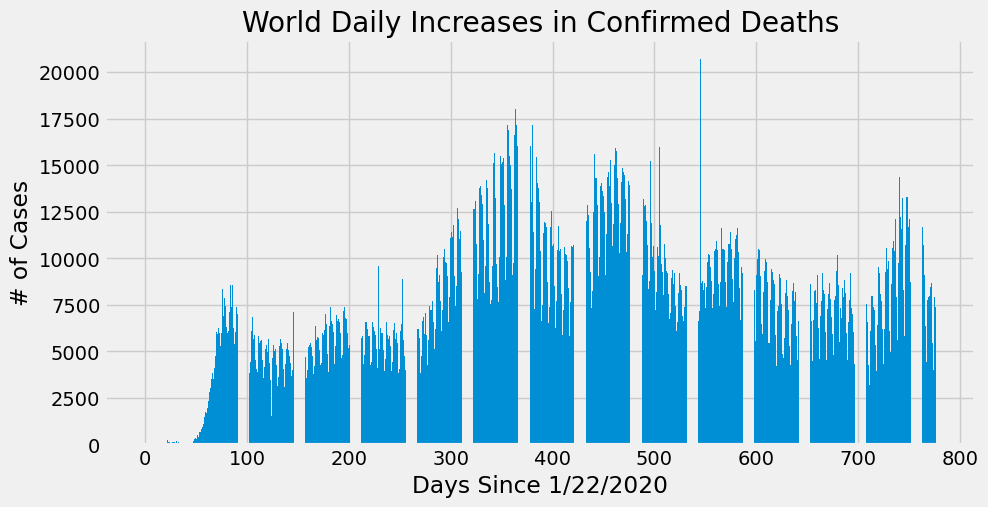

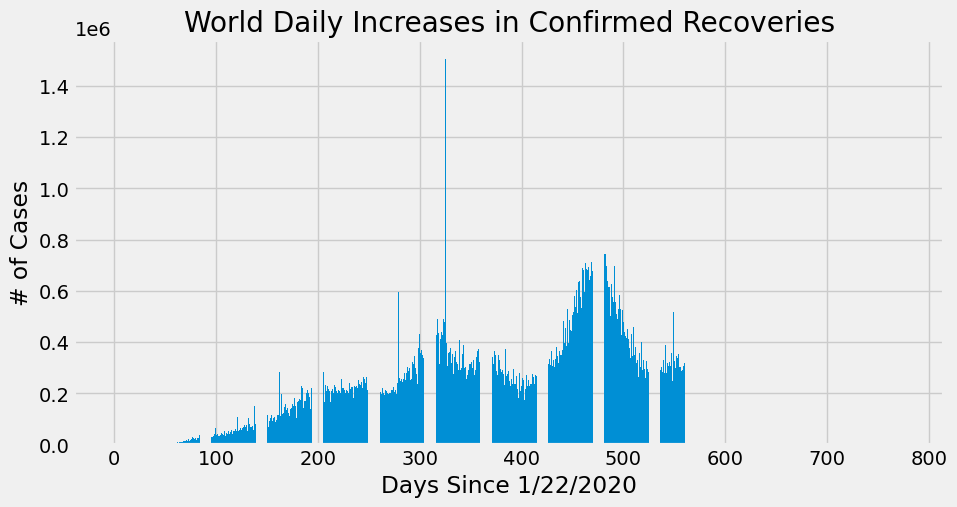

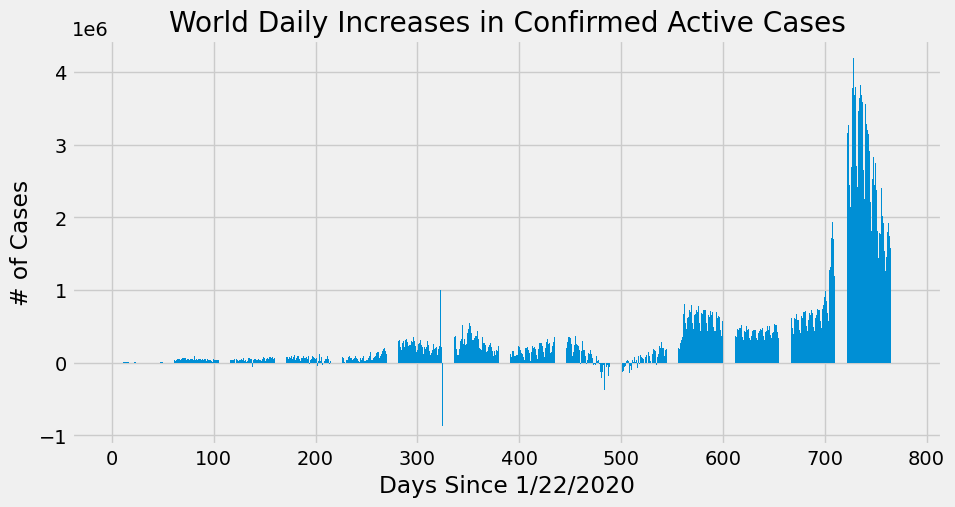

In [12]:
# Chart: Daily Cases Increases
plt.figure(figsize=(10,5), dpi=100)
plt.bar(adjusted_dates, increase_cases)

plt.title("World Daily Increases in Confirmed Cases")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

# Chart: Daily Deaths Increases
plt.figure(figsize=(10,5), dpi=100)
plt.bar(adjusted_dates, increase_deaths)

plt.title("World Daily Increases in Confirmed Deaths")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

# Chart: Daily Recoveries Increases
plt.figure(figsize=(10,5), dpi=100)
plt.bar(adjusted_dates, increase_recovered)

plt.title("World Daily Increases in Confirmed Recoveries")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

# Chart: Daily Cases Increases
plt.figure(figsize=(10,5), dpi=100)
plt.bar(adjusted_dates, increase_active)

plt.title("World Daily Increases in Confirmed Active Cases")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("# of Cases")

plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
# Lists storing daily mortality rate & recovered rate
rate_mortality = []
rate_recovered = []

# Calculate daily  mortality rate & recovered rate and store to lists
for i, cases in enumerate(total_cases):
    rate_mortality.append(total_deaths[i] / cases * 100)
    rate_recovered.append(total_recovered[i] / cases * 100)

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

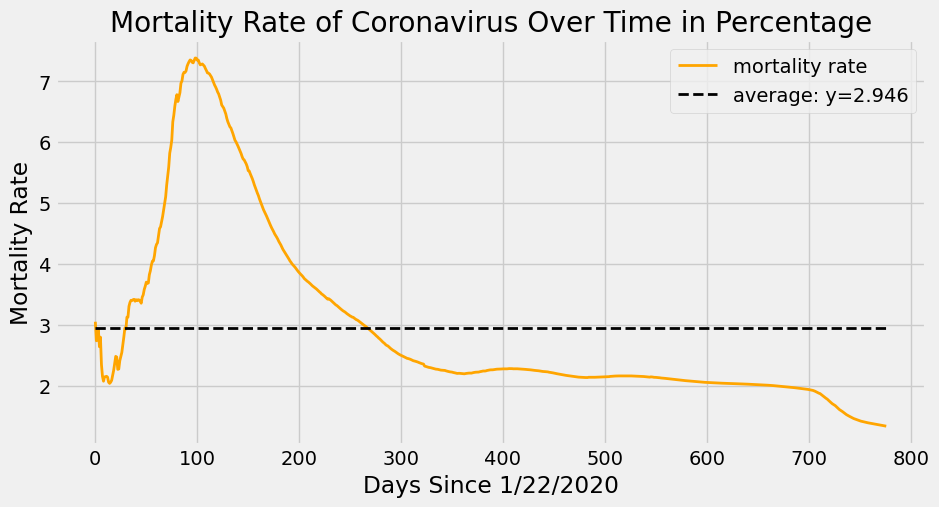

In [14]:
# Chart: Mortality Rate over time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(rate_mortality, color='orange', lw=2, label="mortality rate")

# add average line
y_avg = round(np.array(rate_mortality).mean(), 3) # average Mortality Rate
plt.plot([y_avg] * len(rate_mortality), color='black', lw=2, ls='--', label="average: y={}".format(y_avg))

plt.title("Mortality Rate of Coronavirus Over Time in Percentage")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("Mortality Rate")

plt.legend()
plt.show()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

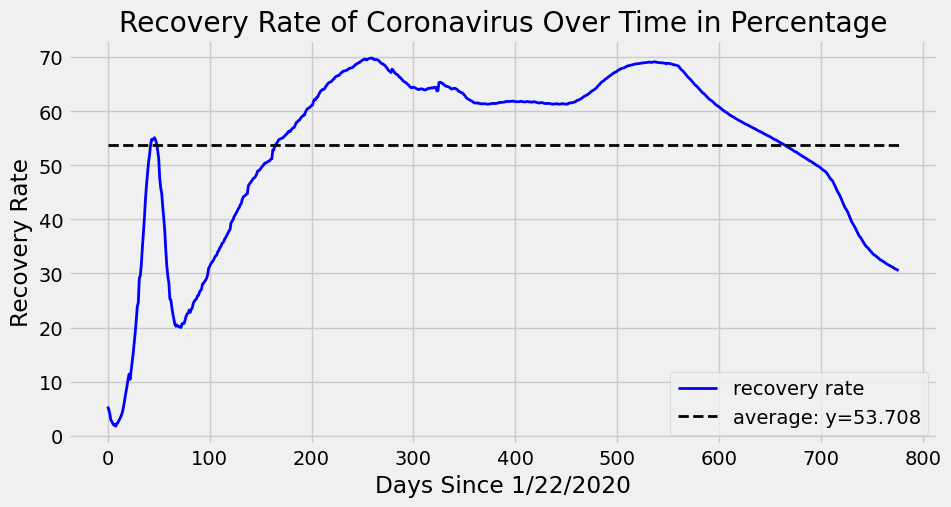

In [15]:
# Chart: Recovery Rate over time
plt.figure(figsize=(10,5), dpi=100)
plt.plot(rate_recovered, color='blue', lw=2, label="recovery rate")

# add average line
y_avg = round(np.array(rate_recovered).mean(), 3) # average Recovery Rate
plt.plot([y_avg] * len(rate_recovered), color='black', lw=2, ls='--', label="average: y={}".format(y_avg))

plt.title("Recovery Rate of Coronavirus Over Time in Percentage")
plt.xlabel("Days Since 1/22/2020")
plt.ylabel("Recovery Rate")

plt.legend()
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the country names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

Insert field 'continent' to confirmed_df

In [17]:
# Get continent codes by using country name applying to function 'country_to_continent_code'
cont_codes = confirmed_df['Country/Region'].apply(country_to_continent_code)

# Get continent names using continent codes
cont_names = [continents[i] for i in cont_codes]

# Insert new column 'continent' to df
confirmed_df.insert(loc=2, column='continent', value=cont_names)

confirmed_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...   173395   173659  173879  174073   
1        0        0        0        0  ...   271527   271563  271702  271825   
2        0        0        0        0  ...   264855   264936  265010  265079   
3        0        0        0        0  ...    37999    37999   38165   38249   
4        0        0        0        0  ...    98701    98741   98746   98746   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0  174214  174214  174331  174582  175000  175353  
1  271825  272030  272030  272210  272250  272337  
2  265130  265186  265227  265265  265297  265323  
3   38342   38434   38434   38434   38620   38710  
4   98746   98796   98796   98806   98806   98829  

[5 rows x 782 columns]

Insert field 'continent' to deaths_df

In [18]:
# Get continent codes by using country name applying to function 'country_to_continent_code'
cont_codes = deaths_df['Country/Region'].apply(country_to_continent_code)

# Get continent names using continent codes
cont_names = [continents[i] for i in cont_codes]

# Insert new column 'continent' to df
deaths_df.insert(loc=2, column='continent', value=cont_names)

deaths_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...     7593     7598    7609    7617   
1        0        0        0        0  ...     3464     3469    3472    3474   
2        0        0        0        0  ...     6831     6835    6840    6843   
3        0        0        0        0  ...      151      151     151     151   
4        0        0        0        0  ...     1899     1900    1900    1900   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0    7619    7619    7622    7623    7626    7630  
1    3474    3478    3478    3482    3483    3483  
2    6848    6852    6853    6855    6857    6858  
3     151     151     151     151     151     152  
4    1900    1900    1900    1900    1900    1900  

[5 rows x 782 columns]

Insert field 'continent' to recoveries_df

In [19]:
# Get continent codes by using country name applying to function 'country_to_continent_code'
cont_codes = recoveries_df['Country/Region'].apply(country_to_continent_code)

# Get continent names using continent codes
cont_names = [continents[i] for i in cont_codes]

# Insert new column 'continent' to df
recoveries_df.insert(loc=2, column='continent', value=cont_names)

recoveries_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  2/27/22  2/28/22  3/1/22  3/2/22  \
0        0        0        0        0  ...    82586    82586   82586   82586   
1        0        0        0        0  ...   130314   130314  130314  130314   
2        0        0        0        0  ...   118409   118409  118409  118409   
3        0        0        0        0  ...    14380    14380   14380   14380   
4        0        0        0        0  ...    39582    39582   39582   39582   

   3/3/22  3/4/22  3/5/22  3/6/22  3/7/22  3/8/22  
0   82586   82586   82586   82586   82586   82586  
1  130314  130314  130314  130314  130314  130314  
2  118409  118409  118409  118409  118409  118409  
3   14380   14380   14380   14380   14380   14380  
4   39582   39582   39582   39582   39582   39582  

[5 rows x 782 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [20]:
countries_df = pd.DataFrame()

# Add Country/Region column by unique country names from 03 df
countries_df['Country/Region'] = np.unique(np.concatenate((countries, countries1, countries2)))

# Add Lat, Long columns by merging with confirmed df
# some countries appears multiple (many provinces): choose median Lat, Long to represent the country
countries_df = countries_df.merge(confirmed_df.groupby(['Country/Region']).median()[['Lat', 'Long']].reset_index(), how='left')

# Add continent, Confirmed columns
countries_df = countries_df.merge(confirmed_df.groupby(['Country/Region', 'continent']).sum()[[dates[-1]]].reset_index(), how='left')
countries_df.rename(columns={dates[-1]: 'Confirmed'}, inplace=True)

# Add Deaths column
countries_df = countries_df.merge(deaths_df.groupby(['Country/Region']).sum()[[dates[-1]]].reset_index(), how='left')
countries_df.rename(columns={dates[-1]: 'Deaths'}, inplace=True)

# Add Recoveries column
countries_df = countries_df.merge(recoveries_df.groupby(['Country/Region']).sum()[[dates[-1]]].reset_index(), how='left')
countries_df.rename(columns={dates[-1]: 'Recoveries'}, inplace=True)

# Add Active column
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Deaths'] - countries_df['Recoveries']

# Add Mortality Rate column
countries_df['Mortality Rate'] = round(countries_df['Deaths'] / countries_df['Confirmed'] * 100, 2)

# Set Country/Region col to index
countries_df.set_index('Country/Region', inplace=True)

countries_df.head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia     175353    7630       82586   
Albania         41.15330  20.168300    Europe     272337    3483      130314   
Algeria         28.03390   1.659600    Africa     265323    6858      118409   
Andorra         42.50630   1.521800    Europe      38710     152       14380   
Angola         -11.20270  17.873900    Africa      98829    1900       39582   

                Active  Mortality Rate  
Country/Region                          
Afghanistan      85137            4.35  
Albania         138540            1.28  
Algeria         140056            2.58  
Andorra          24178            0.39  
Angola           57347            1.92

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [21]:
# Create continents_df by modifying countries_df
continents_df = countries_df.copy()

# Group by continent, sum 
continents_df = continents_df.groupby(['continent']).sum()

# Re-calculate Mortality Rate
continents_df['Mortality Rate'] = round(continents_df['Deaths'] / continents_df['Confirmed'] * 100, 2)

# Drop columns Lat, Long
continents_df = continents_df.drop(['Lat', 'Long'], axis = 1)

continents_df

Confirmed   Deaths  Recoveries     Active  Mortality Rate
continent                                                               
Africa          11390544   250539     5955131    5184874            2.20
Asia           121826369  1344697    57860294   62621378            1.10
Australia        3868363     7171       58287    3802905            0.19
Europe         162910817  1729303    27994507  133187007            1.06
North America   93402476  1390515    12075021   79936940            1.49
Others           1504925    28241      654615     822069            1.88
South America   54815368  1264224    32656668   20894476            2.31

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [22]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis scacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

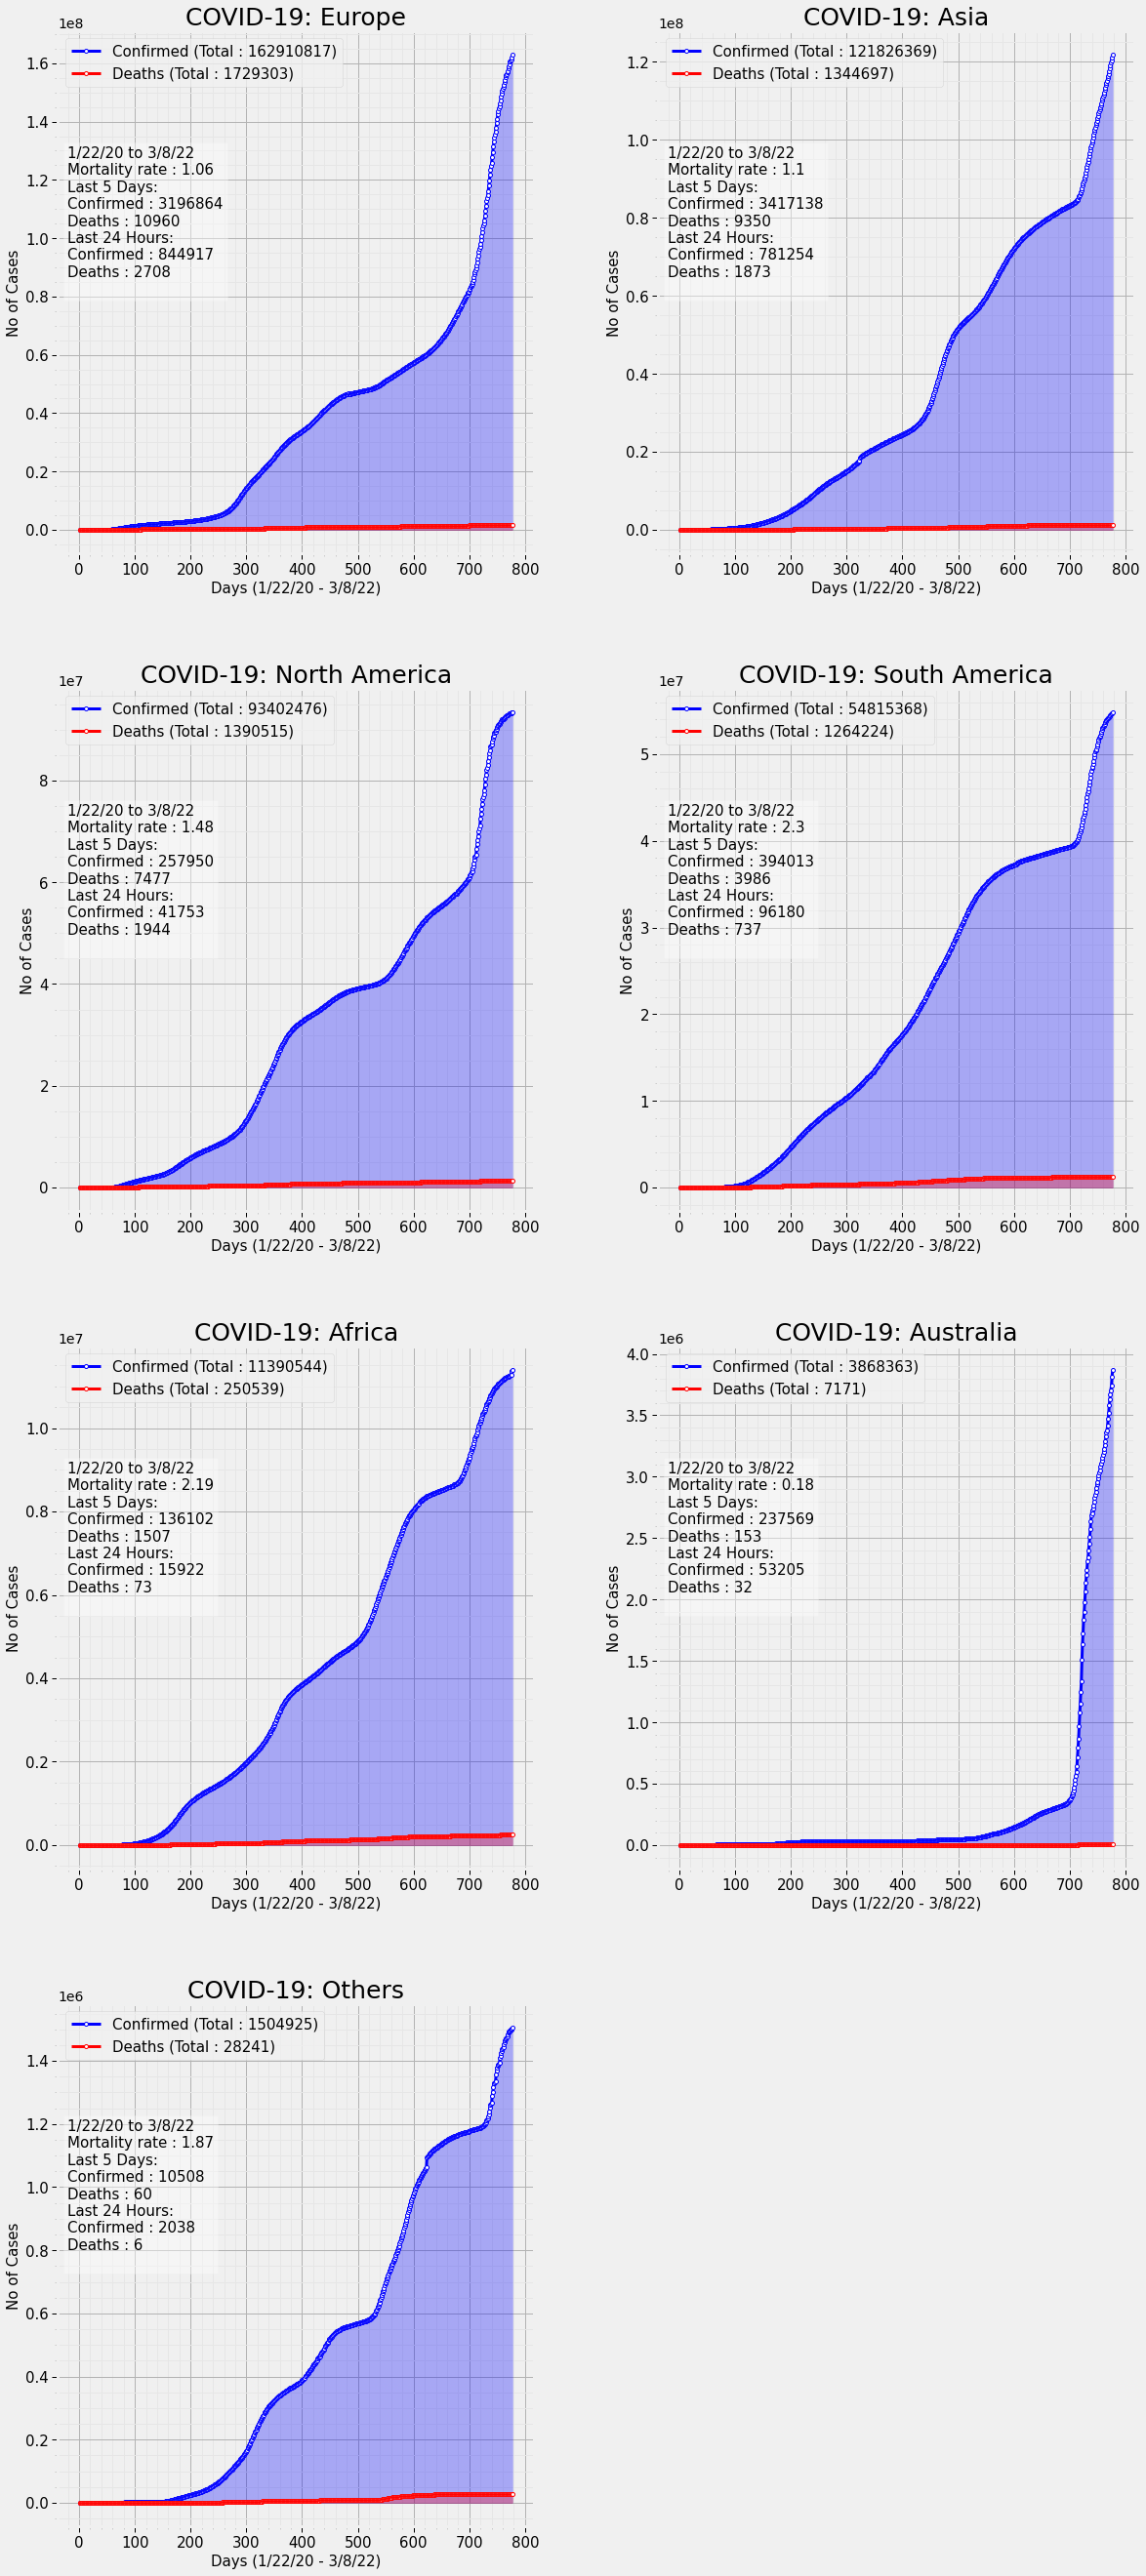

In [23]:
# Get a list of continents sorted by Confirmed desc
continents_df = continents_df.sort_values(by='Confirmed', ascending=False)
sorted_continents = continents_df.index.tolist()

# Plot multiple graphs by rows and columns,
# provided desired number of col, calculate number of rows to fit number of graphs.
col = 2
row = int(math.ceil(len(sorted_continents) / col))

# Figure for each subplot
fig = plt.figure(figsize=(20,40))

# Subplot for each continent
for i in range(len(sorted_continents)):
    visualize_covid_cases(confirmed_df, deaths_df, continent=sorted_continents[i], figure=[fig, row, col, i+1])
    
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

Modify function 'visualize_covid_cases':

In [24]:
def visualize_covid_cases(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries] # modified (add recoveries)
    label = ["Confirmed", "Deaths", "Recoveries"] # modified (add Recoveries)
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:] # modified (add Total_recoveries)
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:] #modified (add Total_recoveries)
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n" # modified (7 Days)
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n" # modified (Total_confirmed[-8])
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n" # modified (Total_deaths[-8])
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n" # modified (add Recoveries)
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n" # modified (add Recoveries)
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

New visualization after modifications:

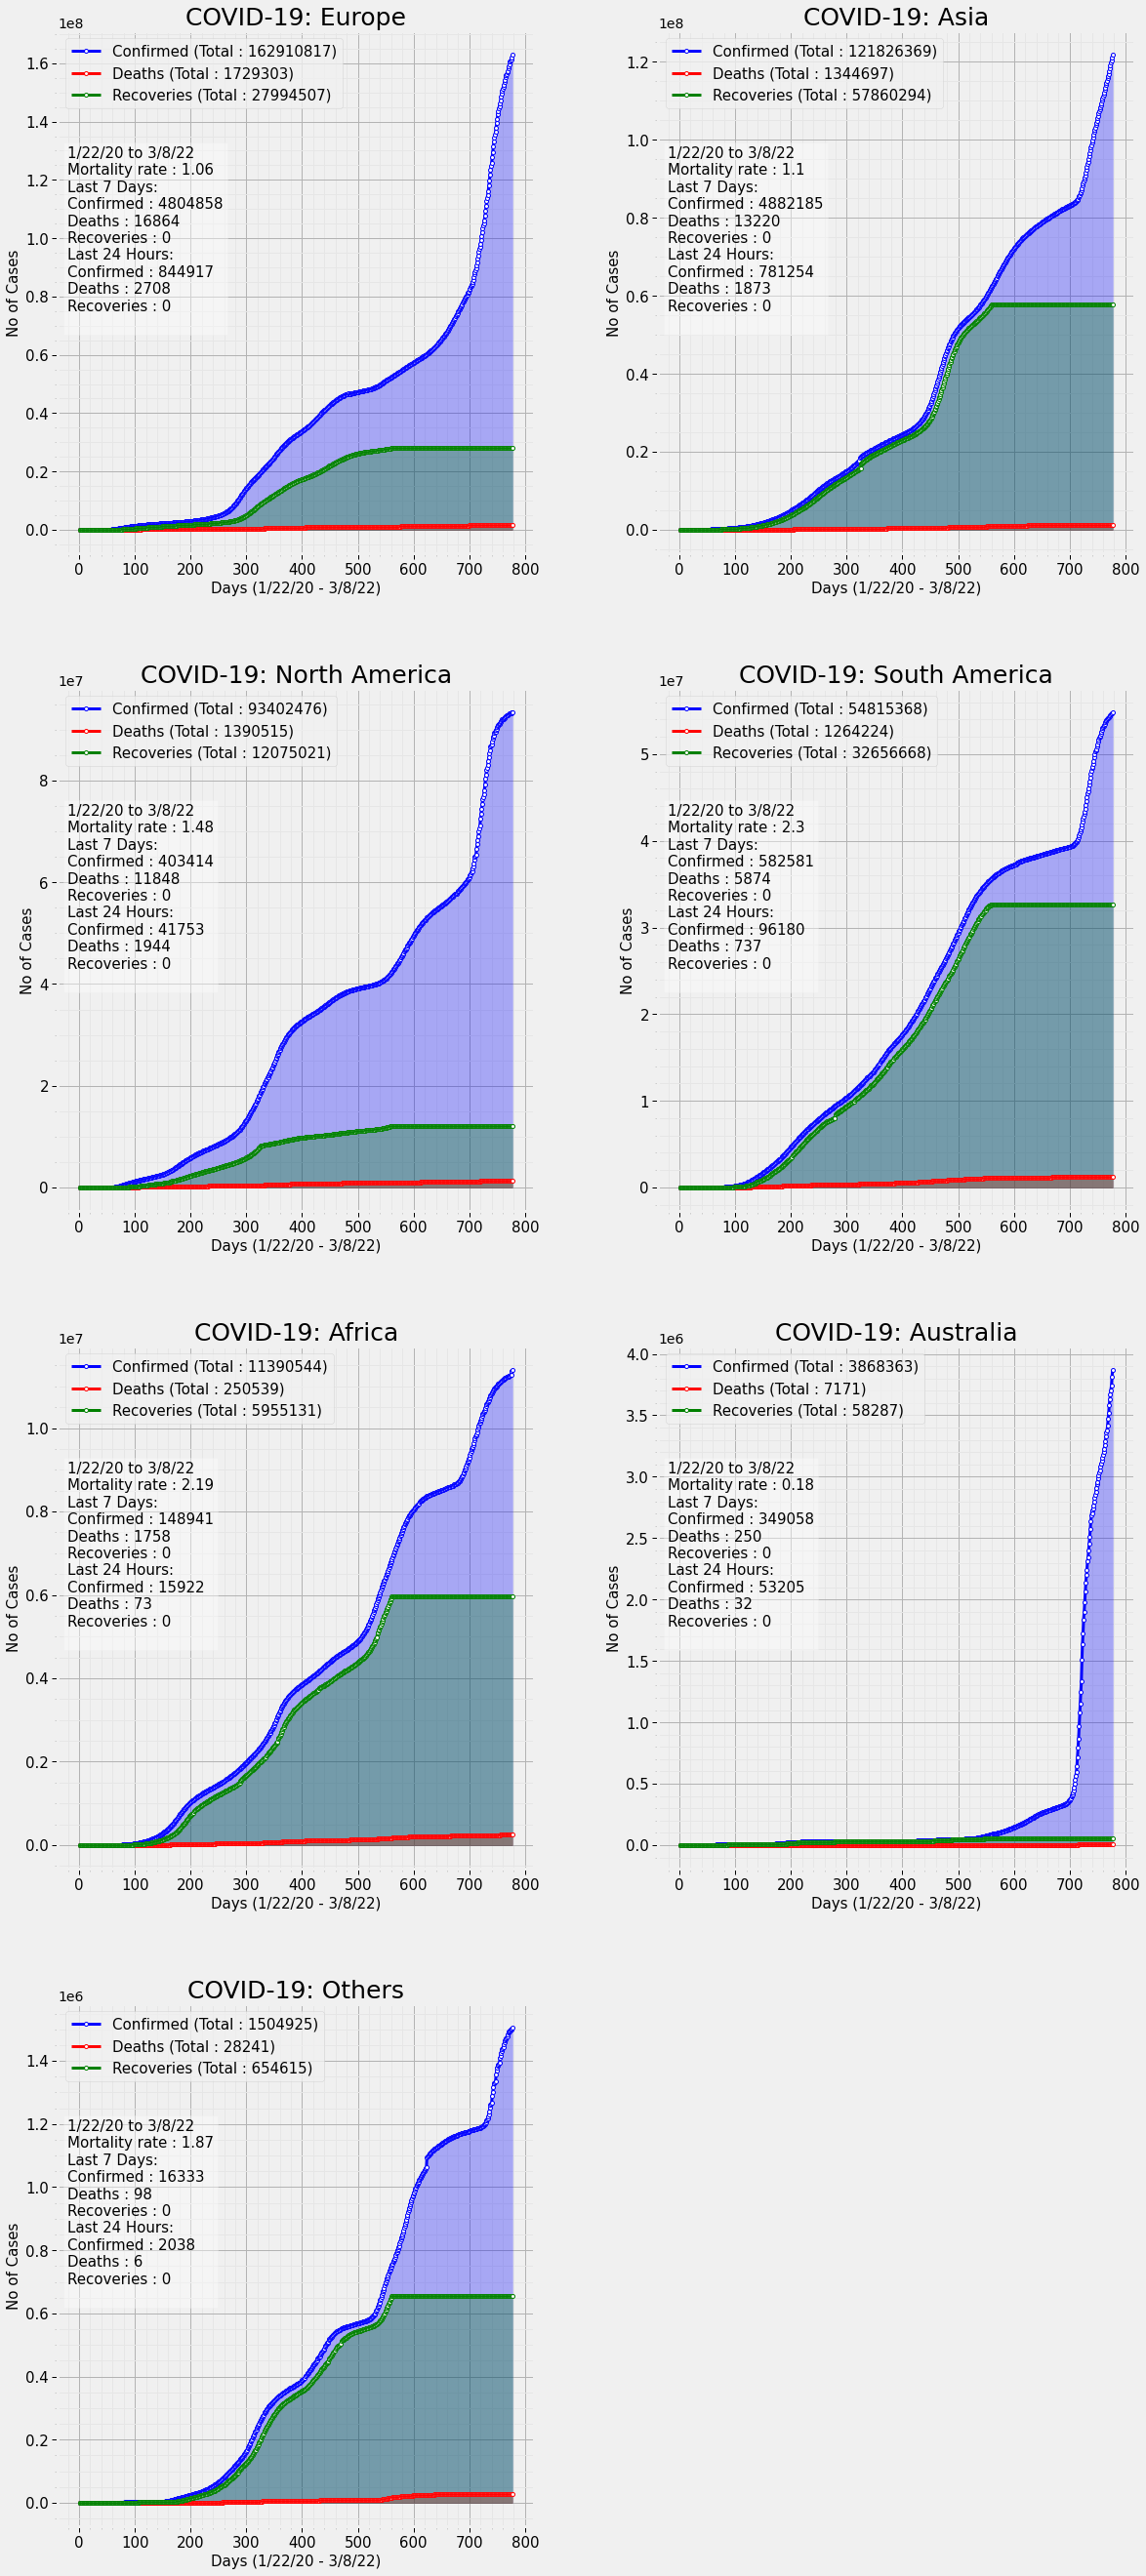

In [25]:
fig = plt.figure(figsize=(20,40))

for i in range(len(sorted_continents)):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent=sorted_continents[i], figure=[fig, row, col, i+1])

# Problem 12
    Visualize the covariance matrix for continents_df.

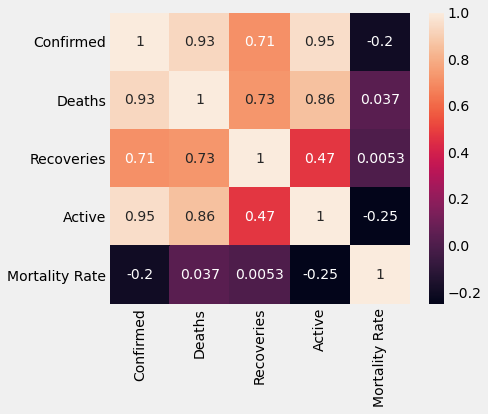

In [26]:
# Correlation table
corr = continents_df.corr()

# Plot heatmap graph on correlation table
plt.figure(figsize=(6,5)) 
sns.heatmap(corr, annot=True)

plt.show()

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

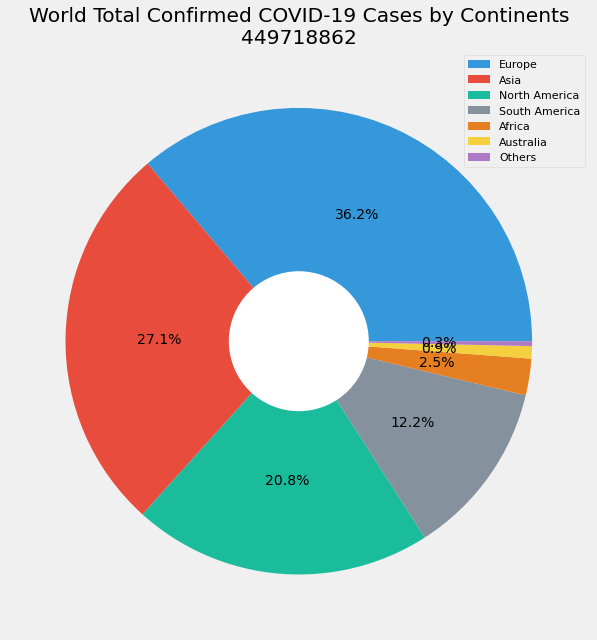

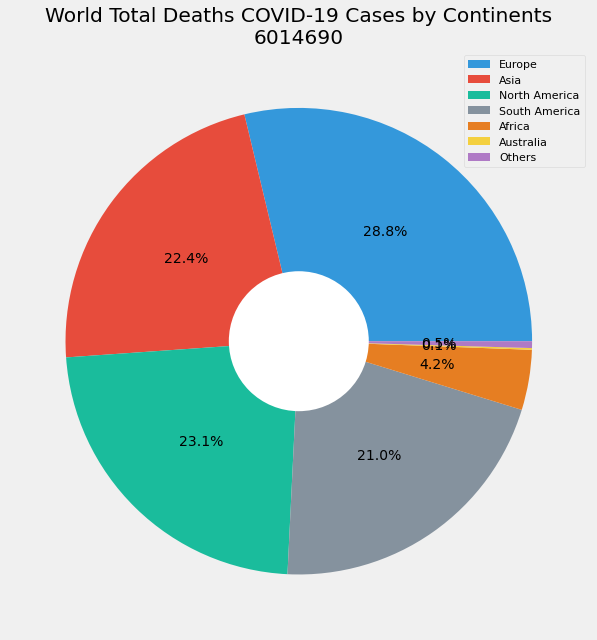

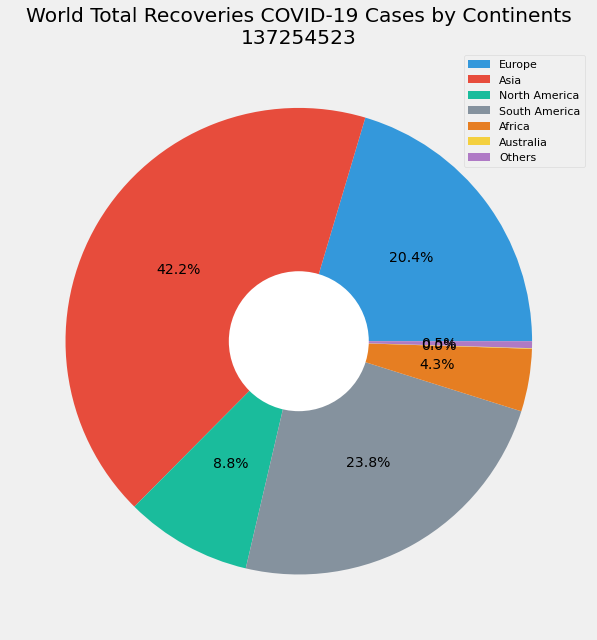

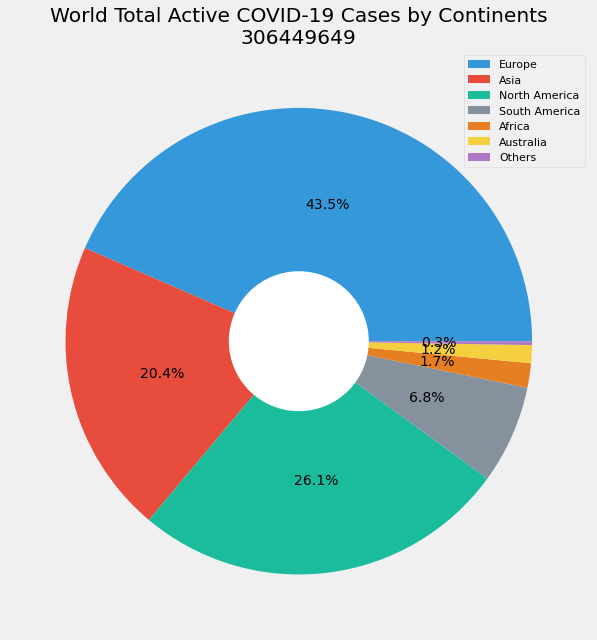

In [27]:
# Categories being plotted
categories = ['Confirmed', 'Deaths', 'Recoveries', 'Active']

# Continents used as wedge labels
labels = continents_df.index

# Wedge colors. Number of colors = number of continents (7)
colors = ['#3498DB', '#E74C3C', '#1ABC9C','#85929E', '#E67E22', '#F4D03F','#AF7AC5']

# Plotting pie charts for each category
for c in categories:
    sizes = continents_df[c].tolist()
    
    # create figure, pie chart
    fig = plt.figure(figsize=(10,10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, pctdistance=0.6, labeldistance=None)
    
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.3, fc='white')

    # add center empty Circle to Pie chart
    fig.gca().add_artist(centre_circle)
    
    # Add legend, title & show chart
    plt.legend(loc=1, prop={'size': 11})
    plt.title("World Total {} COVID-19 Cases by Continents\n{}".format(c, sum(sizes)))
    plt.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.

In [28]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="cartodbpositron", zoom_start=2)

# Larget confirmed cases per country to calculate the relative radius of Circle markers
max_confirmed = countries_df.Confirmed.max()

# html styling popup box
html = """
        <h5 style="text-align:center;"><b>{}</b></h5>
        <li>Confirmed: {}</li>
        <li>Deaths: {}</li>
        <li>Recovered: {}</li>
        <li>Mortality Rate: {}</li>
        """

# Add marker one by one on the map
for country in countries_df.index:
    text = html.format(country, countries_df.loc[country, 'Confirmed'], countries_df.loc[country, 'Deaths'], 
                       countries_df.loc[country, 'Recoveries'], countries_df.loc[country, 'Mortality Rate'])
    folium.Circle(
        location=[countries_df.loc[country].Lat, countries_df.loc[country].Long],
        popup=folium.Popup(text, max_width=2650),
        radius=countries_df.loc[country].Confirmed / max_confirmed * 1400000,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Show the map
m

# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

Prepare data: active cases based on countries' name and date:

In [29]:
# List of unique countries from df
countries = np.unique(np.concatenate((countries, countries1, countries2))) 

# Make a list of dates whose active cases will be plotted,
# choose interval size (time step) to show up data
interval = 50
dates_sample = dates[np.linspace(0, len(dates) - 1, num=len(dates) // interval, dtype=int, endpoint=True)]

# Create an empty df to store active cases of each country at chosen dates.
active_df = pd.DataFrame(columns=['Country/Region', 'Date', 'Active'])

# Add new rows to active_df by parsing through all countries and chosen dates.
for country in countries:
    for date in dates_sample:
        # Cases of a country at a date = sum of all rows containing such country's name & date
        confirmed = confirmed_df[confirmed_df['Country/Region'] == country].loc[:, date].sum() 
        recoveries = recoveries_df[recoveries_df['Country/Region'] == country].loc[:, date].sum()
        deaths = deaths_df[deaths_df['Country/Region'] == country].loc[:, date].sum()
        # Calculate active cases, 
        # check data validity: prevent negative number of avtice cases,
        # set min value = 0
        active = 0
        if confirmed > recoveries + deaths: 
            active = confirmed - recoveries - deaths
        # Add new row to active_df
        active_df.loc[len(active_df)] = [country, date, active]

# Add new column 'Active_log10' to active_df storing the log10 of active cases:
# list storing data for the new column
active_log10 = []

# Calculate log10 of active cases and add to list,
# handle exception log10(0)=-infinity: not perform log10 operation with value 0
for x in active_df.Active:
    if x > 0: x = np.log10(x)
    active_log10.append(x)
    
# Add values to column Active_log10
active_df['Active_log10'] = active_log10

Graph choropleth px map with showing log10(active cases) distribution progressing in time:

In [30]:
# Create plotly express choropleth figure
fig = px.choropleth(active_df,locations='Country/Region',
    locationmode='country names', animation_frame='Date',
    animation_group='Country/Region', color='Active_log10',
    color_continuous_scale= 'spectral_r' , hover_name='Country/Region', 
    title = 'Log of # of Active Cases from {} to {} (time step = {} days)'.format(dates_sample[0], dates_sample[-1], interval))

# Layout
fig.update_layout(height=500, margin={"r":0,"t":30,"l":0,"b":0})

# Show graph
fig.show()

# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [31]:
countries_df_sorted = countries_df.sort_values(by='Confirmed', ascending=False).iloc[:10, :]
countries_df_sorted

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   79369007  961843   
India           20.593684   78.962880           Asia   42975883  515355   
Brazil         -14.235000  -51.925300  South America   29152318  653134   
France           9.287700  -54.720850         Europe   23346927  140642   
United Kingdom  27.000900  -36.939750         Europe   19446892  162936   
Russia          61.524010  105.318756         Europe   16835844  350490   
Germany         51.165691   10.451526         Europe   16326087  124769   
Turkey          38.963700   35.243300           Asia   14425638   95811   
Italy           41.871940   12.567380         Europe   13109527  156201   
Spain           40.463667   -3.749220         Europe   11159574  100859   

                Recoveries    Active  Mortality Rate  
Country/Region                                        
USA                6298082  72109082            1.21  
India             30974748  11485780            1.20  
Brazil            17771228  10727956            2.24  
France              415505  22790780            0.60  
United Kingdom       25037  19258919            0.84  
Russia             5609682  10875672            2.08  
Germany            3659260  12542058            0.76  
Turkey             5478185   8851642            0.66  
Italy              4144608   8808718            1.19  
Spain               150376  10908339            0.90

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.

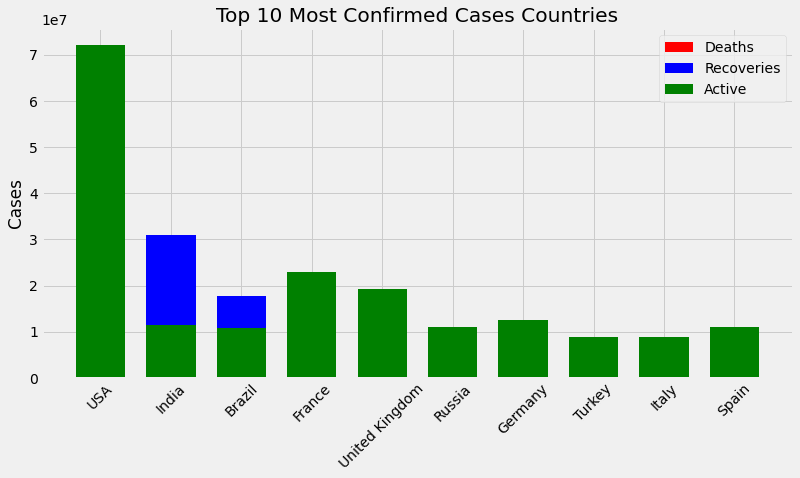

In [32]:
# Figure size
plt.figure(figsize=(12,6))

# Bar width
width = 0.7

# Plot 03-stacked bar graph
plt.bar(countries_df_sorted.index, countries_df_sorted.Deaths, width, color='r', label='Deaths')
plt.bar(countries_df_sorted.index, countries_df_sorted.Recoveries, width, bottom=deaths, color='b',label='Recoveries')
plt.bar(countries_df_sorted.index, countries_df_sorted.Active, width, bottom=recoveries, color='g', label='Active')

# Styling, titles & labels
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.title('Top 10 Most Confirmed Cases Countries')
plt.legend()

plt.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

On the global scale, the COVID 2019 epidemic in the world seems to having reached its peak around the end of January 2022

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


<p>19.1 South America: low number of active due to smaller difference between confirmed & recovery</p>
<p>19.2 Australia: high number of new confirmed in the last 10 days due to very stiff confirmed slope</p>
<p>19.3 South America: due to smaller difference between confirmed & recovery</p>

Re-check answers:

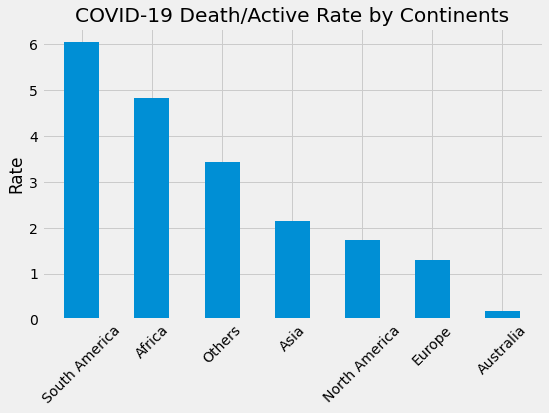

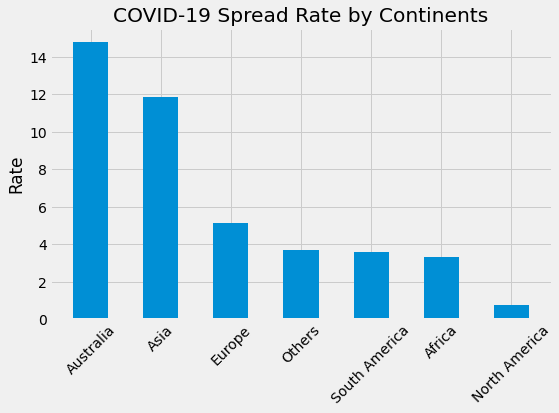

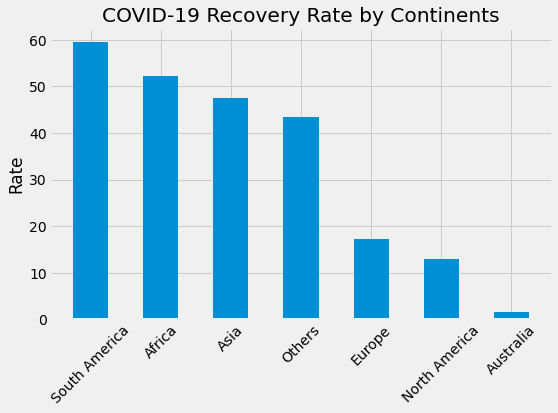

In [33]:
# Add Death/Active Rate column to continents_df
continents_df['Death/Active Rate'] = continents_df.Deaths / continents_df.Active * 100

# Add Spread Rate column to continents_df
confirm10 = np.array([]) # confirmed cases 10 days ago
death10 = np.array([]) # deaths 10 days ago
rev10 = np.array([]) # recoveries 10 days ago

# Iterate each continent name in continents_df:
# sum all confirmed cases in each continent at 10 days ago, add to list;
# do the same for deaths, recoveries.
for c in continents_df.index:
    confirm10 = np.append(confirm10, confirmed_df[confirmed_df['continent'] == c].iloc[:, -11].sum())
    death10 = np.append(death10, deaths_df[deaths_df['continent'] == c].iloc[:, -11].sum())
    rev10 = np.append(rev10, recoveries_df[recoveries_df['continent'] == c].iloc[:, -11].sum())
    
# Add Spread Rate column by formula: 
# spread rate = (latest confirmed - confirmed 10 days ago) / (number of confirmed - death - recoveries 10 days ago) * 100
continents_df['Spread Rate'] = (continents_df.Confirmed - np.array(confirm10)) / (confirm10 - death10 - rev10) * 100

# Add Recovery Rate column to continents_df
continents_df['Recovery Rate'] = continents_df.Recoveries / continents_df.Confirmed * 100

# Plot Bar Graph
# List of categories being plotted
cats = ['Death/Active Rate', 'Spread Rate', 'Recovery Rate']

# Plotting bar charts for each category
# Sort descending by category being plotted
for c in cats:
    continents_df_sorted = continents_df.sort_values(by=c,ascending=False)
    
    # create figure, pie chart
    plt.figure(figsize=(8,5))
    plt.bar(continents_df_sorted.index, continents_df_sorted[c], 0.5)
    
    # Layout
    plt.ylabel('Rate')
    plt.xticks(rotation=45)
    
    # Add title & show chart
    plt.title("COVID-19 {} by Continents".format(c))
    plt.show()

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

<p>20.1 MS Zaandam</p>
<p>20.2 China</p>
<p>20.3 Micronesia</p>

Re-check answer:

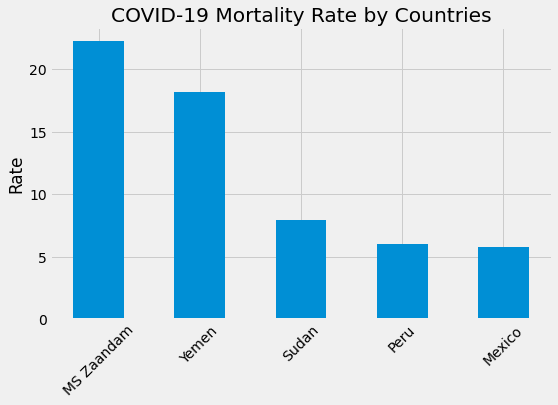

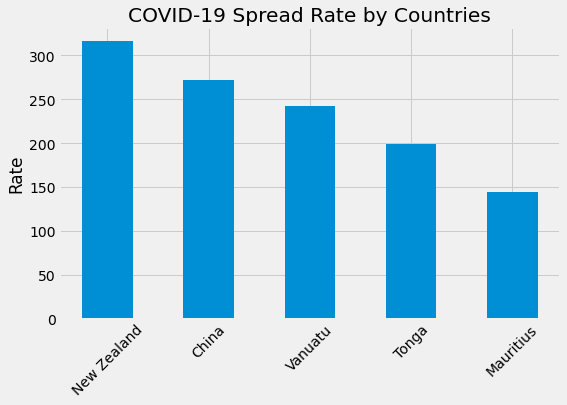

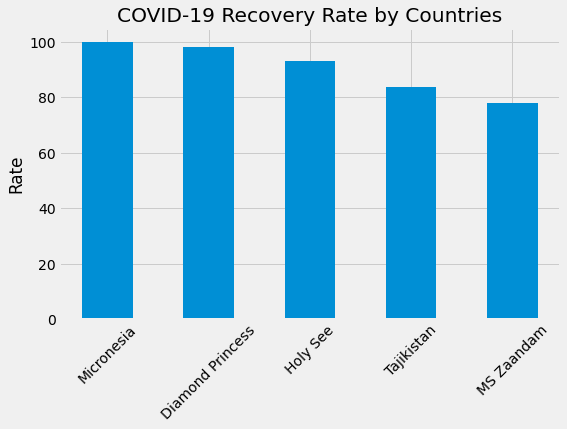

In [34]:
# Add Spread Rate column to countries_df
confirm10 = np.array([]) # confirmed cases 10 days ago
death10 = np.array([]) # deaths 10 days ago
rev10 = np.array([]) # recoveries 10 days ago

# Iterate each country name in countries_df:
# sum all confirmed cases in each country at 10 days ago, add to list;
# do the same for deaths, recoveries.
for c in countries_df.index:
    confirm10 = np.append(confirm10, confirmed_df[confirmed_df['Country/Region'] == c].iloc[:, -11].sum())
    death10 = np.append(death10, deaths_df[deaths_df['Country/Region'] == c].iloc[:, -11].sum())
    rev10 = np.append(rev10, recoveries_df[recoveries_df['Country/Region'] == c].iloc[:, -11].sum())

# Add Spread Rate column by formula: 
# spread rate = (latest confirmed - confirmed 10 days ago) / (number of confirmed - death - recoveries 10 days ago) * 100
countries_df['Spread Rate'] = (countries_df.Confirmed - np.array(confirm10)) / (confirm10 - death10 - rev10) * 100

# Add Recovery Rate column to countries_df
countries_df['Recovery Rate'] = countries_df.Recoveries / countries_df.Confirmed * 100

# Plot Bar Graph
# List of categories being plotted
categories = ['Mortality Rate', 'Spread Rate', 'Recovery Rate']

# Plotting bar charts for each category
# Sort descending by category being plotted
for c in categories:
    countries_df_sorted = countries_df.sort_values(by=c,ascending=False).head(5)
    
    # create figure, pie chart
    plt.figure(figsize=(8,5))
    plt.bar(countries_df_sorted.index, countries_df_sorted[c], 0.5)
    
    # Layout
    plt.ylabel('Rate')
    plt.xticks(rotation=45)
    
    # Add title & show chart
    plt.title("COVID-19 {} by Countries".format(c))
    plt.show()

# Problem 21
**USA dataset**

In [35]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

Load dataset 10 days ago:

In [36]:
us_medical_data_prev = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-26-2020.csv')

Add new columns to 'us_medical_data': Spread_Rate, Recovery_Rate:

In [37]:
us_medical_data['Spread_Rate'] = (us_medical_data_prev.Confirmed - us_medical_data.Confirmed) / us_medical_data_prev.Active * 100
us_medical_data['Recovery_Rate'] = us_medical_data.Recovered / us_medical_data.Confirmed * 100

Show answers, state(s) of highest death/spread/recoveries rate:

In [38]:
# Find highest rate country(s)
top_death_rate = us_medical_data[us_medical_data['Mortality_Rate'] == us_medical_data['Mortality_Rate'].max()]['Province_State']
top_spread_rate = us_medical_data[us_medical_data['Spread_Rate'] == us_medical_data['Spread_Rate'].max()]['Province_State']
top_rev_rate = us_medical_data[us_medical_data['Recovery_Rate'] == us_medical_data['Recovery_Rate'].max()]['Province_State']

# Print answers:
print('Highest death rate state(s): ', top_death_rate.tolist())
print('Highest rate on COVID-19 spread state(s): ', top_spread_rate.tolist())
print('Highest recoveries rate state(s): ', top_rev_rate.tolist())

Highest death rate state(s):  ['Connecticut']
Highest rate on COVID-19 spread state(s):  ['New York']
Highest recoveries rate state(s):  ['Minnesota']


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

## Abstract
The variable we want to predict is 'Confirmed' cases of top 10 confirmed states at 06-Jul-2020 (cumulated confirmed cases) at a specific date.
We shall attempt to use historic data from date x-1 to x-n days to predict the Confirmed number at date x by a simple Linear Regression model.

## Linearity Correlation & Dependency between Features

Review dataset:

In [39]:
us_medical_data.head(2)

Province_State Country_Region          Last_Update      Lat     Long_  \
0        Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1         Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21843.0     1     916.383942       663719.0   
1       1184      16      548.0    620.0     2     161.849237       123753.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.241164  84000001  USA  13536.486998   
1                  NaN        1.351351  84000002  USA  16916.662680   

   Hospitalization_Rate  Spread_Rate  Recovery_Rate  
0              6.493159   -66.285525      49.145375  
1                   NaN  -104.716981      46.283784

Among all data fields, list fields (features) which are possible to have correlation with 'Confirmed':

In [40]:
feats = ['Confirmed', 'Deaths', 'Recovered', 'Testing_Rate', 'People_Hospitalized', 'Incident_Rate']

Supposed we want to use these features to predict the 'Confirmed' number at one week (7 days) in the future, the predictor and predicted datasets are prepared as follows:

In [41]:
# The date that will be predicted
date_y = dt.date(2020, 7, 6) # Year, Month, Day

# Time distance (in days) between predictor & predicted dataset
days = 7

# Format datetime to fit into url (for loading dataset)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'
date_x = date_y - dt. timedelta(days=days) # predictor date = predicted - n days
date_x = r'{:02d}-{:02d}-{}'.format(date_x.month, date_x.day, date_x.year) 
date_y = r'{:02d}-{:02d}-{}'.format(date_y.month, date_y.day, date_y.year) 

# Load predictor/ predicted datasets
data_x = pd.read_csv('{}{}.csv'.format(url, date_x)) # predictor
data_y = pd.read_csv('{}{}.csv'.format(url, date_y)) # predicted  

# Select only states of highest Confirmed cases
data_y = data_y.sort_values(by='Confirmed', ascending=False).head(10)
states = data_y['Province_State'].tolist() # list of highest confirmed state names
data_x = data_x[data_x['Province_State'].isin(states)]

# Reset index
data_y = data_y.reset_index()
del data_y['index']
data_x = data_x.reset_index()
del data_x['index']

# Sort data_x according to Province_State order of data_y
temp_df = data_x.copy()
for i in range(len(states)):
    data_x.loc[[i]] = temp_df[temp_df['Province_State'] == states[i]].iloc[0, :].tolist()
del temp_df

# Extract features
data_x = data_x[feats]
data_y = data_y[['Confirmed']]

print('Predictor dataset ({}):'.format(date_x))
display(data_x.head(5))

print('Predicted dataset ({} ~ {} day(s) later):'.format(date_y, days))
display(data_y.head(5))

Predictor dataset (06-29-2020):


Confirmed  Deaths  Recovered  Testing_Rate  People_Hospitalized  \
0     393403   31242    70435.0  19857.099685              89995.0   
1     230686    5872        NaN  10279.583611                  NaN   
2     146341    3447        NaN  13779.696623              14651.0   
3     158634    2564    81335.0   6273.956635                  NaN   
4     172199   14992    30163.0  15806.732349              19847.0   

   Incident_Rate  
0    2022.267286  
1     583.626996  
2     681.361356  
3     542.952980  
4    1938.699803

Predicted dataset (07-06-2020 ~ 7 day(s) later):


Confirmed
0     397649
1     284325
2     206447
3     204534
4     174766

Calculate correlations between predicted 'Confirmed' & predictor features:

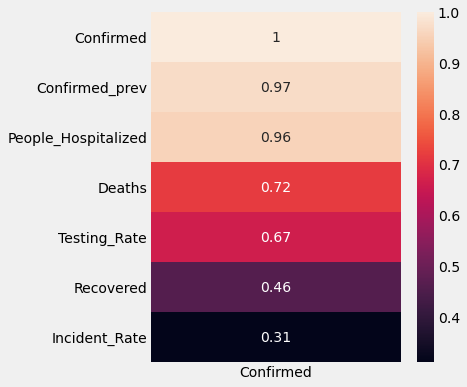

In [42]:
# Distinguish the column 'Confirmed' of the predictor & predicted dataset
data_x.rename(columns = {'Confirmed':'Confirmed_prev'}, inplace = True)

# Create df 'data' including variables from both predictor (features) & predicted (Confirmed) df.
data = pd.concat([data_x, data_y], axis = 1)

# Correlations table, extract only corr to Confirmed cases
corr = data.corr()
corr = corr[['Confirmed']]

# Sort corr values desc
corr = corr.sort_values(by='Confirmed', ascending=False)

# Plot heatmap for corr values
plt.figure(figsize=(5,6)) 
sns.heatmap(corr, annot=True)
plt.show()

Visualize linear correlation by each feature:

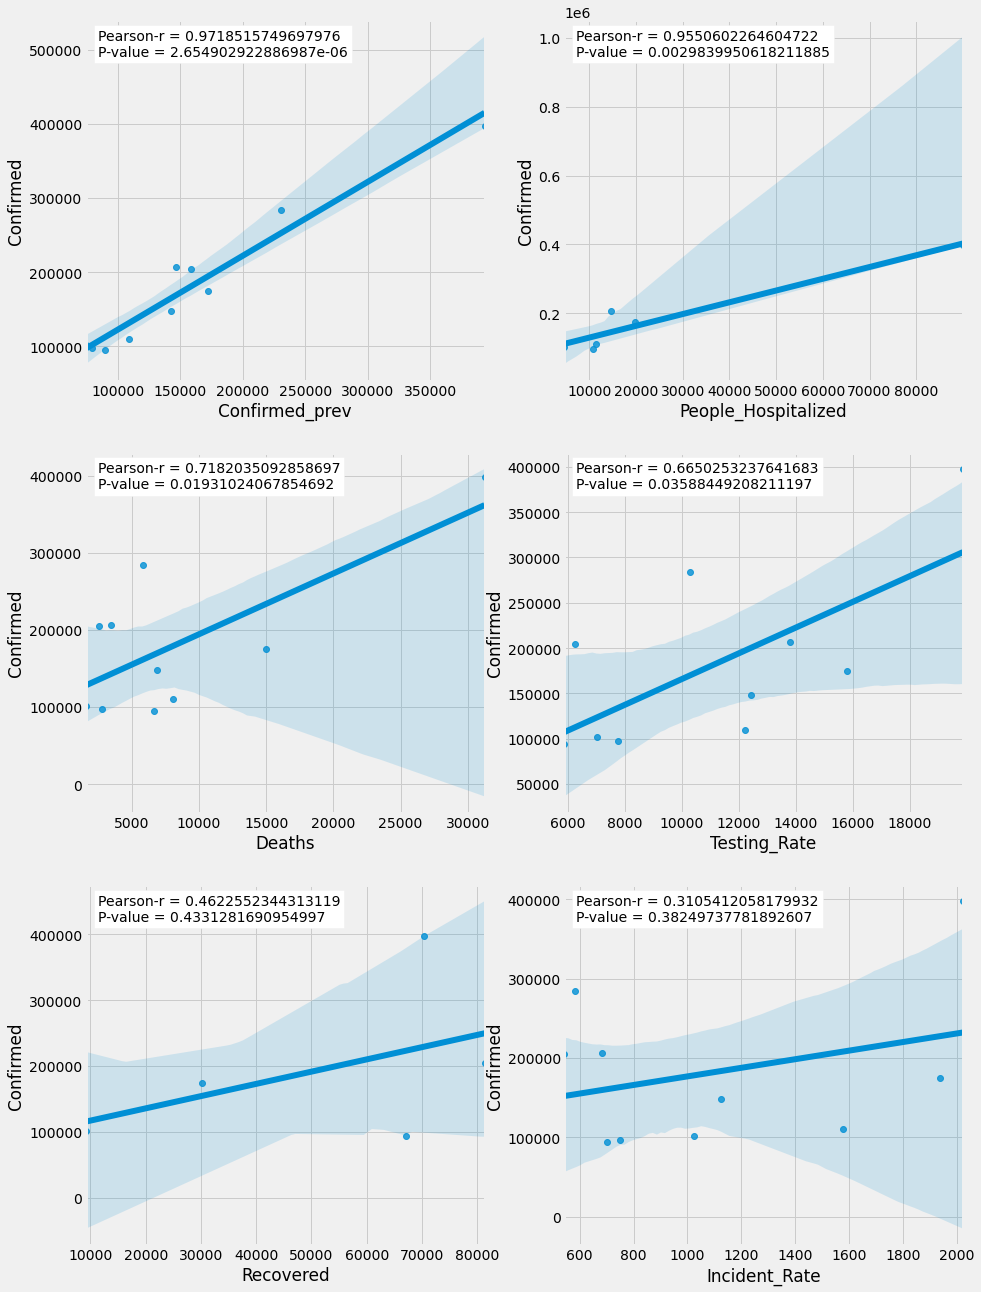

In [43]:
# Sort the feature list descendingly by corr value
feats = corr.index.tolist()[1:]

# Plot seaborn regplots by rows and columns,
# Given a number of columns, calculate number of rows according to number of features
cols = 2
rows = len(feats) // cols + len(feats) % cols

# Create figure, axes
fig, ax = plt.subplots(rows,cols, figsize=(cols * 7, rows * 7))

# Plot while iterating throuhg feature list
row = 0
col = -1
for i, feat in enumerate(feats):
    # Move up row & reset col if reached given number of columns
    if i > 0 and i % cols == 0: 
        row += 1
        col = 0
    else:
        col += 1
      
    # Plot regplot subplot
    sns.regplot(x=feat, y='Confirmed', data=data, ax=ax[row, col])
    
    # Calculate Pearson-r, P-value on non-NaN data and
    # show on graph.
    data_nota = data[data[feat].notna()]
    r, p = stats.pearsonr(data_nota[feat], data_nota['Confirmed'])
    text = 'Pearson-r = {}\nP-value = {}'.format(r, p)
    ax[row, col].text(0.03, 0.9, text, transform=ax[row, col].transAxes,bbox=dict(facecolor='white'))
    
plt.show()

From the above visualization, we shall select one feature that shows the most linear correlation (Pearson-r near 1 or -1) & dependancy (P-value < 0.001) to 'Confirmed' variable: 'Confirmed_prev' (r = 0.97, p = 2.6e-6)

In [44]:
feat = 'Confirmed' # chosen feature, not use name 'Confirmed_prev' due to refer to original field names

## Linear Regression

### Expand dataset
After chosen the feature to predict the 'Confirmed' number, we would attempt to try it on a larger scale (bigger sample size or more days to plot):
<li>Each sample consists of 10 states as selected earlier</li>
<li>Each sample consists of 10 predicted & 10 predictor values</li>
<li>Samples are extracted from datasets of n days backward to the past starting from date of 'us_medical_data' df (06-Jul-2020)</li>

Prepare data:

In [45]:
# Starting date
date = dt.date(2020, 7, 6)

# Df naming predictor as X, predicted as Y for general reference
data = pd.DataFrame(columns=['X', 'Y'])

# number of datasets to load for corresponding X & Y
sample_size = 30

# Parse each dataset starting from date 'date' (06-Jul-2020),
# append each row of data consisting of y (confirmed of date being parsed) & x (confirmed 7 days ago from y)
# total number of rows of 'data' will be 10 * sample_size
for i in range(sample_size):
    date_y = date - dt.timedelta(days=i)
    date_x = date_y - dt.timedelta(days=days)
    date_y = r'{:02d}-{:02d}-{}'.format(date_y.month, date_y.day, date_y.year)
    date_x = r'{:02d}-{:02d}-{}'.format(date_x.month, date_x.day, date_x.year)

    data_y = pd.read_csv('{}{}.csv'.format(url, date_y))    
    data_x = pd.read_csv('{}{}.csv'.format(url, date_x))

    for state in states:
        y = data_y[data_y['Province_State'] == state].Confirmed.sum()
        x = data_x[data_x['Province_State'] == state][feat].sum()
        data.loc[len(data)] = [x, y] 
        
# Converts all values to type int
data['X'] = data['X'].astype(int)
data['Y'] = data['Y'].astype(int)

Data visualization:

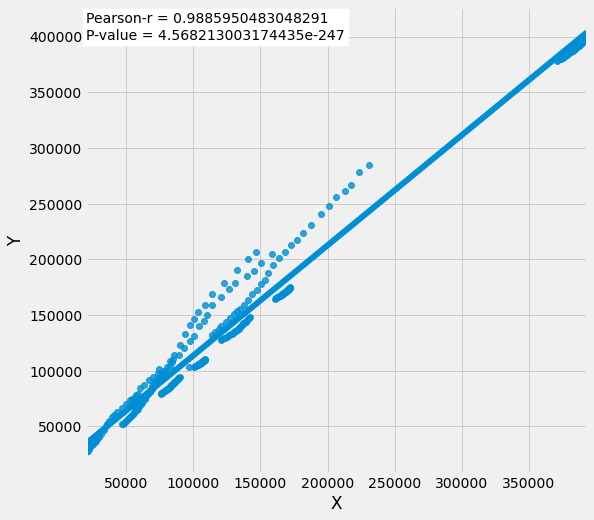

In [46]:
plt.figure(figsize=(8, 8))
sns.regplot(x="X", y="Y", data=data)

# Pearson-r, P-value
r, p = stats.pearsonr(data.X, data.Y)
text = 'Pearson-r = {}\nP-value = {}'.format(r, p)
plt.text(data.X.min(), data.Y.max(), text, bbox=dict(facecolor='white'))

plt.show()

We can see on the graph that the data points are still quite linear even for a larger sample size, with very small P-value and Pearson-r close to 1. Therefore, we would proceed to find the linear equation for our regression model.

### Linear Function 
Find the equation of the most fitted line using the above expanded dataset.

In [47]:
# Pre-processing data for sklearn
x = np.array(data.X)
x = x.reshape(-1,1) # convert to column matrix
y = np.array(data.Y)

# Linear regression object
regression_model = LinearRegression()
  
# Fit the data(train the model)
regression_model.fit(x, y)
  
# Predict
y_predicted = regression_model.predict(x)
  
# model evaluation
mse = mean_squared_error(y,y_predicted)  
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
  
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:', mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# print function
print('Linear function:' , 'y = {} * x + {}'.format(regression_model.coef_[0], regression_model.intercept_))

Slope: [0.9885522]
Intercept: 14877.73215479737
MSE: 200976309.5027626
Root mean squared error:  14176.611354719525
R2 score:  0.9773201695328275
Linear function: y = 0.988552198681934 * x + 14877.73215479737


## Simple Model Test
Apply the Linear function above to predict the Confirmed cases at a date of the same annual period (same month) 01 year in the future (2021)

Prepare data:

In [48]:
# Choose a date to predict
date_y = dt.date(2021, 7, 8) # Year, Month, Day (choose a date near 6-July-2021)

# Format datetime 
date_x = date_y - dt.timedelta(days=days) # 7 days earlier
date_x = r'{:02d}-{:02d}-{}'.format(date_x.month, date_x.day, date_x.year)
date_y = r'{:02d}-{:02d}-{}'.format(date_y.month, date_y.day, date_y.year)

# Load data
data_x = pd.read_csv('{}{}.csv'.format(url, date_x))
data_y = pd.read_csv('{}{}.csv'.format(url, date_y))    

# Select data of pre-determined states
data_x = data_x[data_x['Province_State'].isin(states)]
data_y = data_y[data_y['Province_State'].isin(states)]
states = data_y['Province_State'].tolist()

# Reset index
data_y = data_y.reset_index()
del data_y['index']
data_x = data_x.reset_index()
del data_x['index']

# Sort data_x according to data_y Province_State order
temp_df = data_x.copy()
for i in range(len(states)):
    data_x.loc[[i]] = temp_df[temp_df['Province_State'] == states[i]].iloc[0, :].tolist()
del temp_df

# Extract feature
data_x = data_x[[feat]]
data_y = data_y[['Confirmed']]

print('Predictor dataset ({}): {}'.format(date_x, data_x.shape))
print('Predicted dataset ({} ~ {} day(s) later): {}'.format(date_y, days, data_y.shape))

Predictor dataset (07-01-2021): (10, 1)
Predicted dataset (07-08-2021 ~ 7 day(s) later): (10, 1)


Calculate predicted values & errors:

In [49]:
# Calculate outputs using linear func & params
outputs = (regression_model.coef_[0] * data_x + regression_model.intercept_).astype(int)

# Result table
result = pd.DataFrame()
result['X'] = data_x[feat]
result['Y'] = outputs
result['Actual'] = data_y['Confirmed']
result['Error_%'] = round((result.Y / result.Actual - 1) * 100, 2) # diff rate between prediction & actual value

display(result)

print('MSE =', mean_squared_error(result.Actual, result.Y))
print('Root MSE =', mean_squared_error(result.Actual, result.Y, squared=False))

X        Y   Actual  Error_%
0   895347   899974   898908     0.12
1  3886719  3857102  3898928    -1.07
2  2365464  2353262  2381148    -1.17
3  1135093  1136976  1138492    -0.13
4  1392196  1391136  1394852    -0.27
5   710049   716798   710629     0.87
6  1023613  1026772  1025079     0.17
7  2115377  2106038  2118216    -0.57
8  1226091  1226932  1227346    -0.03
9  3038013  3018112  3049018    -1.01

MSE = 368886526.6
Root MSE = 19206.41889056885


Visualization:

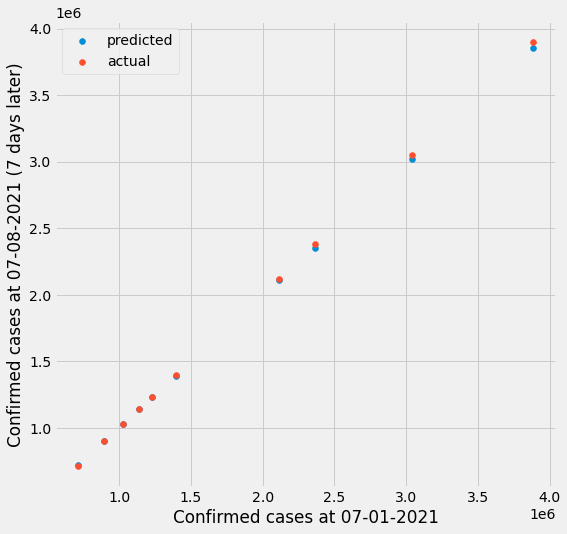

In [50]:
plt.figure(figsize=(8, 8))

plt.scatter(result.X, result.Y)
plt.scatter(result.X, result.Actual)

plt.xlabel('Confirmed cases at {}'.format(date_x))
plt.ylabel('Confirmed cases at {} ({} days later)'.format(date_y, days))
plt.legend(['predicted', 'actual'])

plt.show()

Predicted data points are relatively close to true data points, which shows a good prediction result in this case.